In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model

## Prepare data

In [ ]:
(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

print (x_train.shape)
print (x_test.shape)

11490434/11490434 [==============================] - 1s 0us/step
(60000, 28, 28)
(10000, 28, 28)


## Create model

In [ ]:
latent_dim = 64

class Autoencoder(Model):
  def __init__(self, latent_dim):
    super(Autoencoder, self).__init__()
    self.latent_dim = latent_dim
    self.encoder = tf.keras.Sequential([
      layers.Flatten(),
      layers.Dense(latent_dim, activation='relu'),
    ])
    self.decoder = tf.keras.Sequential([
      layers.Dense(784, activation='sigmoid'),
      layers.Reshape((28, 28))
    ])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

autoencoder = Autoencoder(latent_dim)

## And train it

In [ ]:
autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())

In [ ]:
autoencoder.fit(x_train, x_train,
                epochs=10,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/10
1875/1875 [==============================] - 13s 3ms/step - loss: 0.0245 - val_loss: 0.0096
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0072 - val_loss: 0.0055
Epoch 3/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0052 - val_loss: 0.0046
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0046 - val_loss: 0.0044
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0044 - val_loss: 0.0042
Epoch 6/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0043 - val_loss: 0.0041
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0042 - val_loss: 0.0040
Epoch 8/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0041 - val_loss: 0.0040
Epoch 9/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0041 - val_loss: 0.0039
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.00

## Let's find the anomalies

In [ ]:
encoded_data = autoencoder.encoder(x_test).numpy()
decoded_data = autoencoder.decoder(encoded_data).numpy()

res = []
loss = losses.MeanSquaredError(reduction='sum_over_batch_size')
for i in range(len(x_test)):
    l = loss(decoded_data[i], x_test[i])
    res.append(l.numpy())

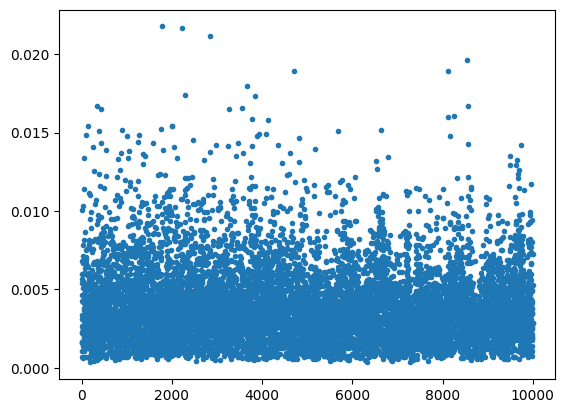

In [ ]:
plt.plot(res, '.')
plt.show()

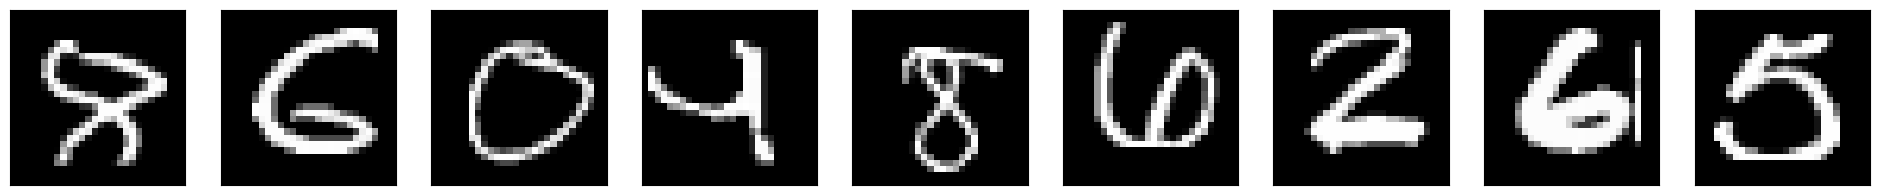

In [ ]:
res2 = [i for i, x in enumerate(res) if res[i] > 0.017]

plt.figure(figsize=(24, 8))

for i in range(len(res2)):
    ax = plt.subplot(1, len(res2), i + 1)
    plt.imshow(x_test[res2[i]])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

## Add some different data

In [ ]:
from tensorflow.keras.datasets import fashion_mnist

(x_train1, _), (x_test1, _) = fashion_mnist.load_data()
images_to_add = x_train1[:10].astype('float32') / 255

4422102/4422102 [==============================] - 1s 0us/step


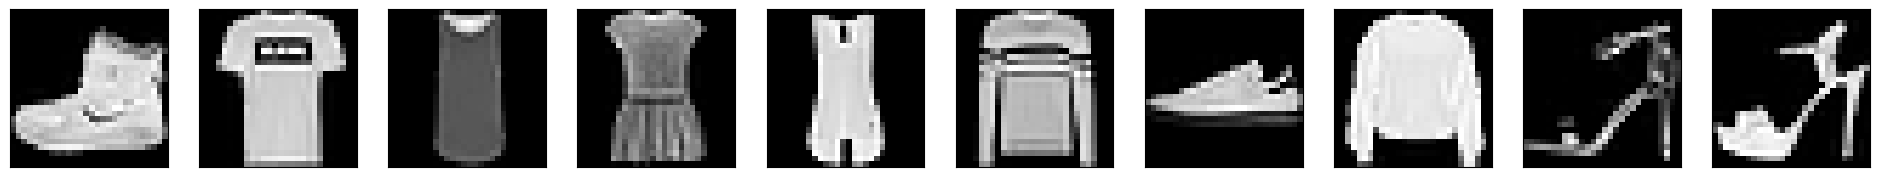

In [ ]:
plt.figure(figsize=(24, 8))
loss = losses.MeanSquaredError(reduction='sum_over_batch_size')
for i in range(len(images_to_add)):
    ax = plt.subplot(1, len(images_to_add), i + 1)
    plt.imshow(images_to_add[i])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

In [ ]:
x_test = list(x_test)
for i in images_to_add:
    x_test.append(i)
x_test = np.array(x_test)

In [ ]:
encoded_data = autoencoder.encoder(images_to_add).numpy()
decoded_data = autoencoder.decoder(encoded_data).numpy()

for i in range(len(decoded_data)):
    l = loss(decoded_data[i], images_to_add[i])

    res.append(l.numpy())

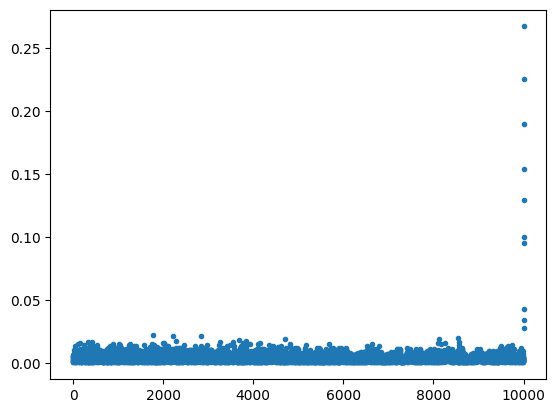

In [ ]:
plt.plot(res, '.')
plt.show()

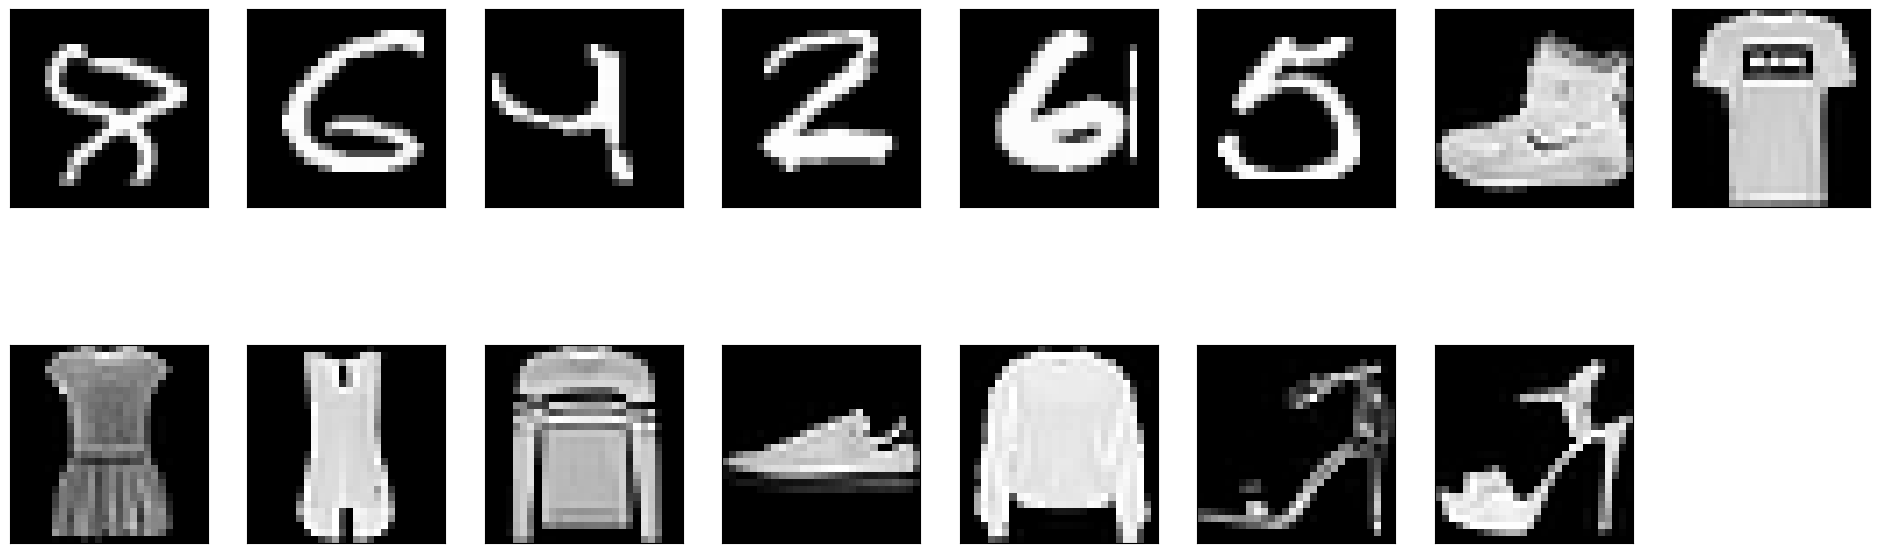

In [ ]:
res2 = [i for i, x in enumerate(res) if res[i] > 0.018]

plt.figure(figsize=(24, 8))

for i in range(len(res2)//2 ):
    ax = plt.subplot(2, len(res2)//2, i + 1)
    plt.imshow(x_test[res2[i]])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax = plt.subplot(2, len(res2)//2, i + len(res2)//2)
    plt.imshow(x_test[res2[i+len(res2)//2]])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()